In [1]:
# !pip install numpy pandas matplotlib seaborn scikit-learn statsmodels shap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
no_gas_compo_data = pd.read_excel('Dataset/NonCatalytic.xlsx')
data = no_gas_compo_data.copy()

In [3]:
#drop row where NO. == NaN
data = data.dropna(subset=['NO.'])

In [4]:
#removing empty rows
data = data.dropna(how='all')
data

,NO.,biomass,waste plastics,MB,VB,FCB,AshB,CB,HB,NB,...,HR,HTT,GAS,OIL,CHAR,CO,CO2,H2,CH4,DOI
1,1.0,Biomasses of empty fruit bunch,Low-density polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,18.4,67.1,14.5,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
2,2.0,Biomasses of empty fruit bunch,Low-density polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,15.4,82.6,2,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
3,3.0,Biomasses of empty fruit bunch,Polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,25.9,59.8,14.3,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
4,4.0,Biomasses of empty fruit bunch,Polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,21.6,75.3,3.1,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
5,5.0,Palm fond,Low-density polyethylene,7.51,73.32,14.11,5.06,39.1,6.74,2.3,...,10,540,19.9,65,15.1,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,0.5,99.5,0,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
249,249.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,12.84,71.74,15.42,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
250,250.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,15.53,67.52,16.95,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
251,251.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,19.66,59.28,21.06,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550


In [5]:
data.columns

Index(['NO.', 'biomass', 'waste plastics', 'MB', 'VB', 'FCB', 'AshB', 'CB',
       'HB', 'NB', 'SB', 'OB', 'PR', 'MP', 'CP', 'HP', 'NP', 'SP', 'OP',
       'AshP', 'VP', 'FCP', 'T', 'HR', 'HTT', 'GAS', 'OIL', 'CHAR', 'CO',
       'CO2', 'H2', 'CH4', 'DOI'],
      dtype='object')

In [6]:
data.drop(columns=['NO.', 'DOI'], axis=1, inplace=True)

In [7]:
data.columns

Index(['biomass', 'waste plastics', 'MB', 'VB', 'FCB', 'AshB', 'CB', 'HB',
       'NB', 'SB', 'OB', 'PR', 'MP', 'CP', 'HP', 'NP', 'SP', 'OP', 'AshP',
       'VP', 'FCP', 'T', 'HR', 'HTT', 'GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2',
       'CH4'],
      dtype='object')

In [8]:
#predictive_columns are the columns that we will use to predict the target variable i.e. GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2','CH4'
predictive_columns = ['GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2', 'CH4']
X = data.drop(columns=predictive_columns)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    object 
 1   waste plastics  252 non-null    object 
 2   MB              252 non-null    object 
 3   VB              252 non-null    object 
 4   FCB             252 non-null    object 
 5   AshB            252 non-null    object 
 6   CB              252 non-null    object 
 7   HB              252 non-null    object 
 8   NB              252 non-null    object 
 9   SB              252 non-null    object 
 10  OB              252 non-null    object 
 11  PR              252 non-null    float64
 12  MP              252 non-null    object 
 13  CP              252 non-null    object 
 14  HP              252 non-null    object 
 15  NP              252 non-null    object 
 16  SP              252 non-null    object 
 17  OP              252 non-null    object 


In [10]:
#Numeric encoding of biomass and waste plastics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['biomass'] = le.fit_transform(X['biomass'])
X['waste plastics'] = le.fit_transform(X['waste plastics'])

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    int64  
 1   waste plastics  252 non-null    int64  
 2   MB              252 non-null    object 
 3   VB              252 non-null    object 
 4   FCB             252 non-null    object 
 5   AshB            252 non-null    object 
 6   CB              252 non-null    object 
 7   HB              252 non-null    object 
 8   NB              252 non-null    object 
 9   SB              252 non-null    object 
 10  OB              252 non-null    object 
 11  PR              252 non-null    float64
 12  MP              252 non-null    object 
 13  CP              252 non-null    object 
 14  HP              252 non-null    object 
 15  NP              252 non-null    object 
 16  SP              252 non-null    object 
 17  OP              252 non-null    object 


In [12]:
#converting all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    int64  
 1   waste plastics  252 non-null    int64  
 2   MB              252 non-null    float64
 3   VB              252 non-null    float64
 4   FCB             252 non-null    float64
 5   AshB            252 non-null    float64
 6   CB              252 non-null    float64
 7   HB              252 non-null    float64
 8   NB              252 non-null    float64
 9   SB              252 non-null    float64
 10  OB              252 non-null    float64
 11  PR              252 non-null    float64
 12  MP              252 non-null    float64
 13  CP              252 non-null    float64
 14  HP              252 non-null    float64
 15  NP              252 non-null    float64
 16  SP              252 non-null    float64
 17  OP              252 non-null    float64


In [13]:
#normalisation of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    float64
 1   waste plastics  252 non-null    float64
 2   MB              252 non-null    float64
 3   VB              252 non-null    float64
 4   FCB             252 non-null    float64
 5   AshB            252 non-null    float64
 6   CB              252 non-null    float64
 7   HB              252 non-null    float64
 8   NB              252 non-null    float64
 9   SB              252 non-null    float64
 10  OB              252 non-null    float64
 11  PR              252 non-null    float64
 12  MP              252 non-null    float64
 13  CP              252 non-null    float64
 14  HP              252 non-null    float64
 15  NP              252 non-null    float64
 16  SP              252 non-null    float64
 17  OP              252 non-null    flo

In [14]:
y = data['OIL']

In [15]:
y = y.apply(pd.to_numeric, errors='coerce')
y.info()

<class 'pandas.core.series.Series'>
Index: 252 entries, 1 to 252
Series name: OIL
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


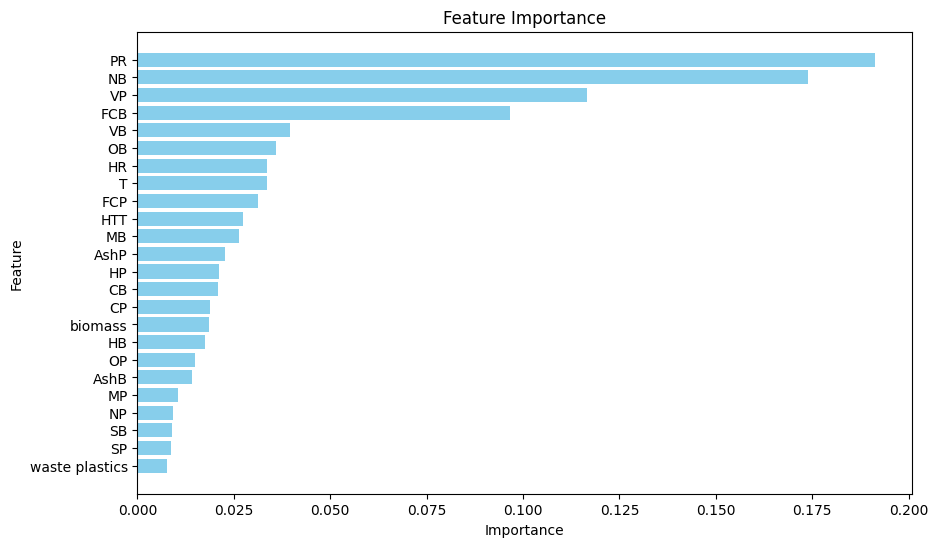

,Feature,Importance
11,PR,0.191421
8,NB,0.173922
19,VP,0.116579
4,FCB,0.096711
3,VB,0.039590
10,OB,0.035829
22,HR,0.033587
21,T,0.033573
20,FCP,0.031394
23,HTT,0.027442


In [16]:
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X_scaled.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# also listing the values
importance_df

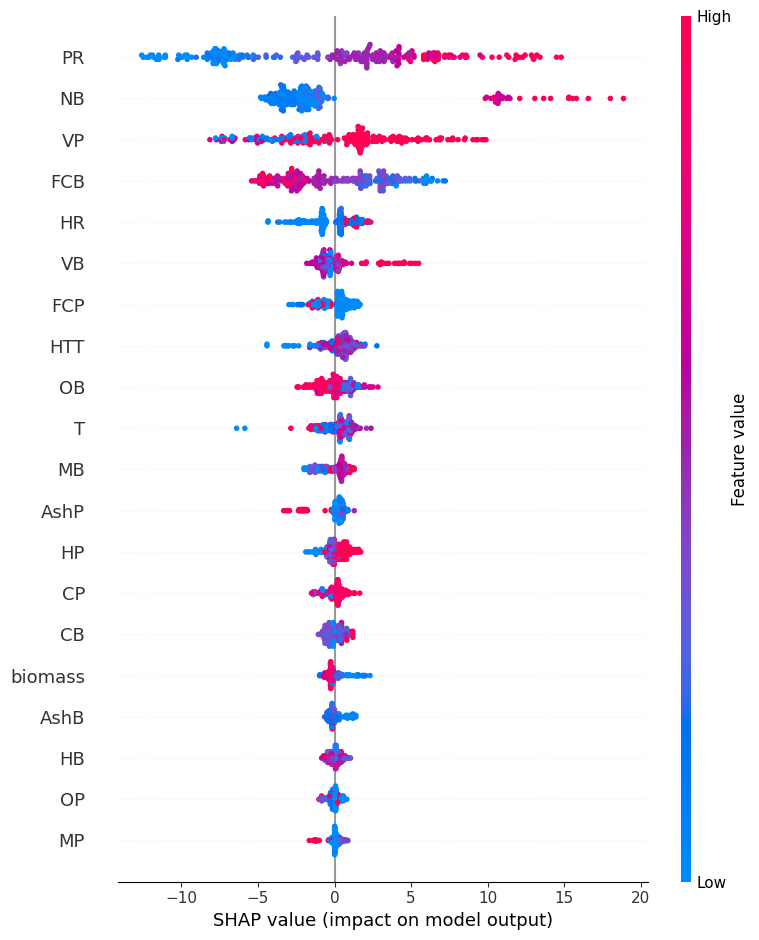

In [17]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_scaled)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names)


In [18]:
#Starting with Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 115.26319295385194
R^2 Score: 0.6725407702165748


In [19]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ada Boost": AdaBoostRegressor(random_state=42),
    "Grad Boost": GradientBoostingRegressor(random_state=42),
    "XG Boost": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

SVM - Mean Squared Error: 237.71368169496057, R^2 Score: 0.32466265143305884
KNN - Mean Squared Error: 113.93192494275173, R^2 Score: 0.6763228621956224
Decision Tree - Mean Squared Error: 120.29851847365862, R^2 Score: 0.6582355633750041
Random Forest - Mean Squared Error: 60.79294600686661, R^2 Score: 0.8272890871273697
Ada Boost - Mean Squared Error: 85.32575354534498, R^2 Score: 0.7575921261539607
Grad Boost - Mean Squared Error: 44.37263454034366, R^2 Score: 0.873938693197057
XG Boost - Mean Squared Error: 54.18999366531566, R^2 Score: 0.8460478741490568


In [20]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LightGBM Regressor
lgbm_model = LGBMRegressor(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM - Mean Squared Error: {mse_lgbm}")
print(f"LightGBM - R^2 Score: {r2_lgbm}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 24
[LightGBM] [Info] Start training from score 50.053553
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

2025-12-23 10:36:28.150099: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-23 10:36:28.150135: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-23 10:36:28.150139: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-23 10:36:28.150454: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-23 10:36:28.150936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/1000
 1/13 [=>............................] - ETA: 3s - loss: 3434.3323 - mse: 3434.3323

2025-12-23 10:36:28.650585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-12-23 10:36:28.675726: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 1s 19ms/step - loss: 2855.9614 - mse: 2855.9614 - val_loss: 2737.0659 - val_mse: 2737.0659
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 2778.4556 - mse: 2778.4556 - val_loss: 2663.8782 - val_mse: 2663.8782
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 2696.9463 - mse: 2696.9463 - val_loss: 2591.0144 - val_mse: 2591.0144
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 2611.9976 - mse: 2611.9976 - val_loss: 2509.3582 - val_mse: 2509.3582
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 2519.8855 - mse: 2519.8855 - val_loss: 2408.2607 - val_mse: 2408.2607
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 2412.2959 - mse: 2412.2959 - val_loss: 2303.1812 - val_mse: 2303.1812
Epoch 7/1000
13/13 [==============================] - 0s 12ms/step - loss: 2295.8506 - mse: 2295.8506 - val_loss: 2183.7422 - val_mse: 2183.7422
Epo

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

Epoch 1/1000
13/13 [==============================] - 0s 17ms/step - loss: 2851.0896 - mse: 2851.0896 - val_loss: 2742.5264 - val_mse: 2742.5264
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 2770.4055 - mse: 2770.4055 - val_loss: 2667.0649 - val_mse: 2667.0649
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 2690.7004 - mse: 2690.7004 - val_loss: 2590.7083 - val_mse: 2590.7083
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 2603.2944 - mse: 2603.2944 - val_loss: 2504.6284 - val_mse: 2504.6284
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 2506.9282 - mse: 2506.9282 - val_loss: 2413.3225 - val_mse: 2413.3225
Epoch 6/1000
13/13 [==============================] - 0s 8ms/step - loss: 2403.4543 - mse: 2403.4543 - val_loss: 2304.7720 - val_mse: 2304.7720
Epoch 7/1000
13/13 [==============================] - 0s 8ms/step - loss: 2281.2073 - mse: 2281.2073 - val_loss: 2180.4966 - val_mse: 2

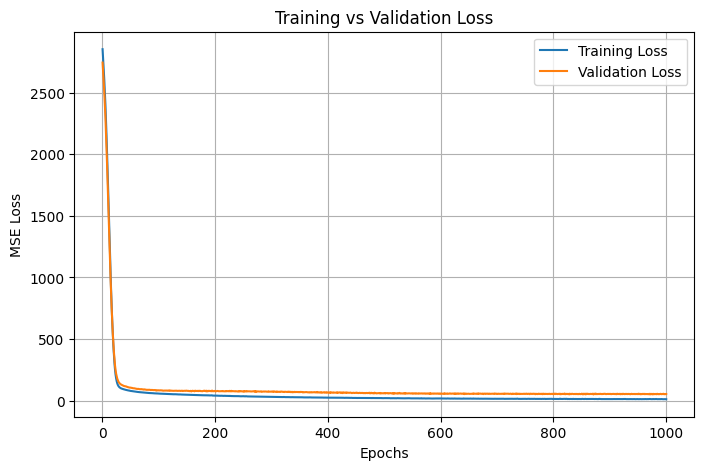

In [23]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


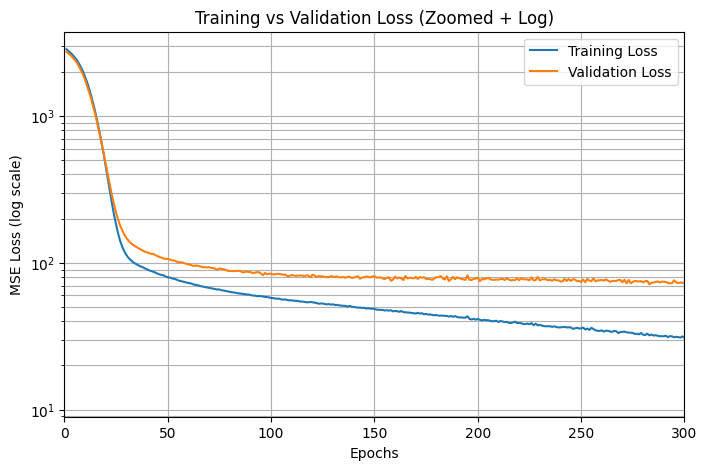

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.xlim(0, 300)
plt.yscale('log')

plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('Training vs Validation Loss (Zoomed + Log)')
plt.legend()
plt.grid(True, which="both")
plt.show()


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

Epoch 1/1000


2025-12-23 10:39:51.702580: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 0s 20ms/step - loss: 2800.1250 - mse: 2800.1250 - val_loss: 2667.2754 - val_mse: 2667.2754
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 2686.8000 - mse: 2686.8000 - val_loss: 2560.1672 - val_mse: 2560.1672
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 2562.5798 - mse: 2562.5798 - val_loss: 2438.7358 - val_mse: 2438.7358
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 2426.0269 - mse: 2426.0269 - val_loss: 2297.9561 - val_mse: 2297.9561
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 2262.8442 - mse: 2262.8442 - val_loss: 2136.8655 - val_mse: 2136.8655
Epoch 6/1000
13/13 [==============================] - 0s 8ms/step - loss: 2071.7371 - mse: 2071.7371 - val_loss: 1956.3003 - val_mse: 1956.3003
Epoch 7/1000
13/13 [==============================] - 0s 8ms/step - loss: 1869.3273 - mse: 1869.3273 - val_loss: 1756.1357 - val_mse: 1756.1357
Epoc